# Properties Data Preprocess

Preprocess the raw properties data to curated

## Import packages


In [132]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the raw data


In [133]:
df = pd.read_csv("../../data/raw/raw_domain_properties.csv")
df.head()

,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude
0,https://www.domain.com.au/12-mckenzie-road-ech...,"12 McKenzie Road,",ECHUCA VIC 3564,ECHUCA,3564,NaN,Contact Agent,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.domain.com.au/667-glenhuntly-road-...,"667 Glenhuntly Road,",CAULFIELD VIC 3162,CAULFIELD,3162,House,"$38,000 p.a. Incl. Outgoings + GST",NaN,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,NaN,NaN,NaN,-37.886023,145.017306
2,https://www.domain.com.au/upstairs-2c-staley-s...,"Upstairs 2C Staley Street,",BRUNSWICK VIC 3056,BRUNSWICK,3056,House,"$35,000 Annually",NaN,Be Creative1st floor offices/studiosEasy walki...,NaN,NaN,2.0,-37.765592,144.963305
3,https://www.domain.com.au/ground-floor-325-vic...,"Ground Floor 325 Victoria Street,",BRUNSWICK VIC 3056,BRUNSWICK,3056,House,Contact Agent,NaN,Prime Commercial SpaceNestled in a dynamic Bru...,NaN,1.0,1.0,-37.766398,144.959420
4,https://www.domain.com.au/8-chamberlain-road-r...,"8 Chamberlain Road,",REDCASTLE VIC 3523,REDCASTLE,3523,Vacant land,"$28,000 Per Year !!",NaN,"8 Chamberlin Road, RedcastleCentury 21 Paramou...",NaN,NaN,NaN,-36.724729,144.760942


## Ensure correct data types

In [134]:
# string data types
df['properties_URL'] = df['properties_URL'].astype(str)
df['address_line1'] = df['address_line1'].astype(str)
df['address_line2'] = df['address_line2'].astype(str)
df['suburb'] = df['suburb'].astype(str)
df['postcode'] = df['postcode'].astype(str)
df['type'] = df['type'].astype(str)
df['price'] = df['price'].astype(str)
df['bond'] = df['bond'].astype(str)
df['description'] = df['description'].astype(str)

# check
df.dtypes

properties_URL     object
address_line1      object
address_line2      object
suburb             object
postcode           object
type               object
price              object
bond               object
description        object
bed               float64
bath              float64
parking           float64
latitude          float64
longitude         float64
dtype: object

## Change string in suburb to lower letter


In [135]:
# Convert the 'suburb' column values to lowercase
df['suburb'] = df['suburb'].str.lower()

# Capitalize the first letter of each word in the 'suburb' column
df['suburb'] = df['suburb'].str.title()

# Display the first few rows of the 'suburb' column to confirm the change
df['suburb']

0             Echuca
1          Caulfield
2          Brunswick
3          Brunswick
4          Redcastle
            ...     
9498      Bairnsdale
9499         Kyabram
9500         Tongala
9501       Wonthaggi
9502    Dinner Plain
Name: suburb, Length: 9503, dtype: object

## Change price to price per week

In [136]:
## add payment type column: per_week, per_year, per_month
## lower case price
## if per week
## if per month
## if per year

def weekly_price(price_str):
    try:
        # Convert the string to lowercase
        price_str = price_str.lower()
        
        # Extract the numeric price value after the "$" sign
        price_value = float(re.search(r'\$(\d+[\.,]?\d*)', price_str).group(1).replace(',', ''))
        
        # If price is greater than 20,000, consider it as per year and divide by 52
        if price_value > 20000:
            return price_value / 52
        
        # If "month" is in the string, consider it as per month and divide by 4.33
        elif 'month' in price_str:
            if 'w' in price_str:
                return price_value
            else:
                return price_value / 4.33
        
        # Otherwise, consider the price as per week
        else:
            return price_value
        
    except:
        return np.nan

# Apply the function to the 'price' column
df['price_per_week'] = df['price'].apply(weekly_price)

# Display the first few rows to see the changes
df[['price', 'price_per_week']]

,price,price_per_week
0,Contact Agent,NaN
1,"$38,000 p.a. Incl. Outgoings + GST",730.769231
2,"$35,000 Annually",673.076923
3,Contact Agent,NaN
4,"$28,000 Per Year !!",538.461538
...,...,...
9498,FULLY BOOKED,NaN
9499,From $85 per month,19.630485
9500,From $80 Per Month,18.475751
9501,$77 per calendar month,17.782910


In [137]:
# Drop rows where "price_per_week" is NaN
df = df.dropna(subset=["price_per_week"])

# Display the first few rows of the filtered data
df.head()

,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude,price_per_week
1,https://www.domain.com.au/667-glenhuntly-road-...,"667 Glenhuntly Road,",CAULFIELD VIC 3162,Caulfield,3162,House,"$38,000 p.a. Incl. Outgoings + GST",nan,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,NaN,NaN,NaN,-37.886023,145.017306,730.769231
2,https://www.domain.com.au/upstairs-2c-staley-s...,"Upstairs 2C Staley Street,",BRUNSWICK VIC 3056,Brunswick,3056,House,"$35,000 Annually",nan,Be Creative1st floor offices/studiosEasy walki...,NaN,NaN,2.0,-37.765592,144.963305,673.076923
4,https://www.domain.com.au/8-chamberlain-road-r...,"8 Chamberlain Road,",REDCASTLE VIC 3523,Redcastle,3523,Vacant land,"$28,000 Per Year !!",nan,"8 Chamberlin Road, RedcastleCentury 21 Paramou...",NaN,NaN,NaN,-36.724729,144.760942,538.461538
5,https://www.domain.com.au/1-weston-street-balw...,"1 Weston Street,",BALWYN VIC 3103,Balwyn,3103,House,"$9,950 weekly",$59700,"Lifestyle, Modern & Luxury Living Awaits**Sche...",6.0,7.0,8.0,-37.811758,145.077551,9950.000000
6,https://www.domain.com.au/14a-ethel-street-mal...,"14A Ethel Street,",MALVERN VIC 3144,Malvern,3144,House,Fully furn-$5000 per week based on 3 month rental,$20000,"$5000 per week based on a 3 month rental, $47...",4.0,4.0,NaN,-37.848059,145.038048,5000.000000


## Remove Duplicate

In [138]:
# Remove duplicates based on the "properties_URL" column
df = df.drop_duplicates(subset="properties_URL")

## Encode URL to ID

In [139]:
# Create a mapping of properties_URL to unique integer IDs
df['property_id'] = df['properties_URL'].factorize()[0] + 1

# Display the first few rows to confirm the encoding
df[['properties_URL', 'property_id']].head()

,properties_URL,property_id
1,https://www.domain.com.au/667-glenhuntly-road-...,1
2,https://www.domain.com.au/upstairs-2c-staley-s...,2
4,https://www.domain.com.au/8-chamberlain-road-r...,3
5,https://www.domain.com.au/1-weston-street-balw...,4
6,https://www.domain.com.au/14a-ethel-street-mal...,5


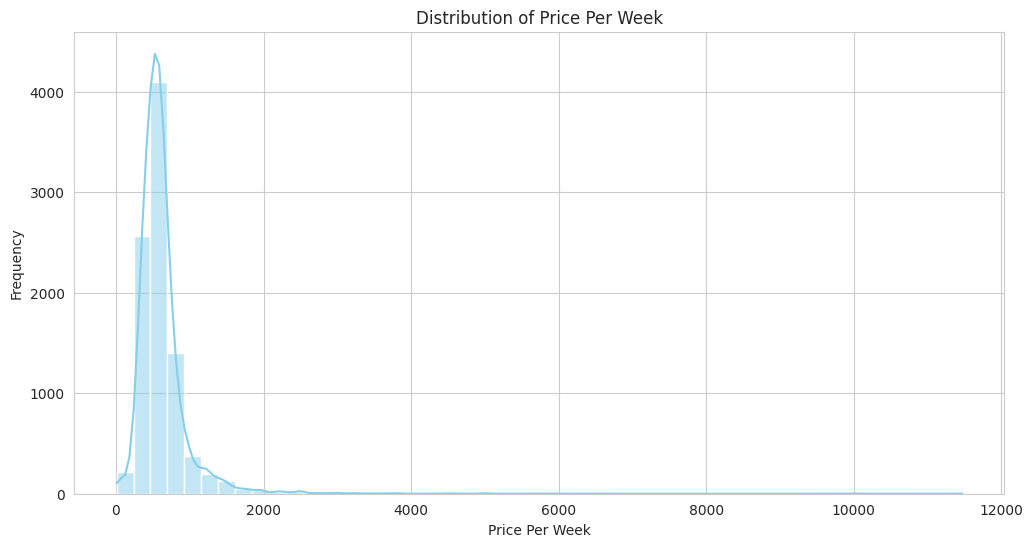

In [140]:
# Set the style
sns.set_style("whitegrid")

# Plot the distribution of the "price_per_week" column
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_week'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price Per Week')
plt.xlabel('Price Per Week')
plt.ylabel('Frequency')
plt.show()

## Imputate missing value for bond

In [141]:
# Remove dollar signs and commas from the 'bond' column
df['bond'] = df['bond'].str.replace('$', '').str.replace(',', '').astype(float)

# Compute the average bond by 'suburb' and 'type'
avg_bond_by_suburb_and_type = df.groupby(['suburb', 'type'])['bond'].transform('mean')

# Impute the NaN values in 'bond' column with the computed average
df['bond'].fillna(avg_bond_by_suburb_and_type, inplace=True)
df = df.dropna(subset=['bond'])

# Display the first few rows of the imputed dataset
df.head()

/tmp/ipykernel_522985/871512674.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['bond'] = df['bond'].str.replace('$', '').str.replace(',', '').astype(float)


,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude,price_per_week,property_id
1,https://www.domain.com.au/667-glenhuntly-road-...,"667 Glenhuntly Road,",CAULFIELD VIC 3162,Caulfield,3162,House,"$38,000 p.a. Incl. Outgoings + GST",5825.000000,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,NaN,NaN,NaN,-37.886023,145.017306,730.769231,1
2,https://www.domain.com.au/upstairs-2c-staley-s...,"Upstairs 2C Staley Street,",BRUNSWICK VIC 3056,Brunswick,3056,House,"$35,000 Annually",3467.777778,Be Creative1st floor offices/studiosEasy walki...,NaN,NaN,2.0,-37.765592,144.963305,673.076923,2
5,https://www.domain.com.au/1-weston-street-balw...,"1 Weston Street,",BALWYN VIC 3103,Balwyn,3103,House,"$9,950 weekly",59700.000000,"Lifestyle, Modern & Luxury Living Awaits**Sche...",6.0,7.0,8.0,-37.811758,145.077551,9950.000000,4
6,https://www.domain.com.au/14a-ethel-street-mal...,"14A Ethel Street,",MALVERN VIC 3144,Malvern,3144,House,Fully furn-$5000 per week based on 3 month rental,20000.000000,"$5000 per week based on a 3 month rental, $47...",4.0,4.0,NaN,-37.848059,145.038048,5000.000000,5
7,https://www.domain.com.au/4807-27-therry-stree...,"4807/27 Therry Street,",MELBOURNE VIC 3000,Melbourne,3000,Apartment / Unit / Flat,$5000 Per Week,10000.000000,Penthouse paradisePhone enquiry code for this ...,3.0,3.0,1.0,-37.806988,144.961014,5000.000000,6


## Fill NaN in bed, bath, and parking


In [142]:
# Fill NaN values in 'bed', 'bath', and 'parking' columns with 0
df[['bed', 'bath', 'parking']] = df[['bed', 'bath', 'parking']].fillna(0)

# Display the first few rows of the dataset after filling NaN values
df.head()

,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude,price_per_week,property_id
1,https://www.domain.com.au/667-glenhuntly-road-...,"667 Glenhuntly Road,",CAULFIELD VIC 3162,Caulfield,3162,House,"$38,000 p.a. Incl. Outgoings + GST",5825.000000,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,0.0,0.0,0.0,-37.886023,145.017306,730.769231,1
2,https://www.domain.com.au/upstairs-2c-staley-s...,"Upstairs 2C Staley Street,",BRUNSWICK VIC 3056,Brunswick,3056,House,"$35,000 Annually",3467.777778,Be Creative1st floor offices/studiosEasy walki...,0.0,0.0,2.0,-37.765592,144.963305,673.076923,2
5,https://www.domain.com.au/1-weston-street-balw...,"1 Weston Street,",BALWYN VIC 3103,Balwyn,3103,House,"$9,950 weekly",59700.000000,"Lifestyle, Modern & Luxury Living Awaits**Sche...",6.0,7.0,8.0,-37.811758,145.077551,9950.000000,4
6,https://www.domain.com.au/14a-ethel-street-mal...,"14A Ethel Street,",MALVERN VIC 3144,Malvern,3144,House,Fully furn-$5000 per week based on 3 month rental,20000.000000,"$5000 per week based on a 3 month rental, $47...",4.0,4.0,0.0,-37.848059,145.038048,5000.000000,5
7,https://www.domain.com.au/4807-27-therry-stree...,"4807/27 Therry Street,",MELBOURNE VIC 3000,Melbourne,3000,Apartment / Unit / Flat,$5000 Per Week,10000.000000,Penthouse paradisePhone enquiry code for this ...,3.0,3.0,1.0,-37.806988,144.961014,5000.000000,6


## Extract "is_furnished" from description

In [143]:
# Convert the description column to lowercase
df['description_lower'] = df['description'].str.lower()

# Tokenize the descriptions and get a set of unique words
unique_words = set()
df['description_lower'].str.split().apply(unique_words.update)

# Identify potential keywords related to furnished properties
furnished_keywords = {word for word in unique_words if 'furnish' in word}

# Split the furnished_keywords set into unfurnished_keywords and furnished_keywords
unfurnished_keywords = {word for word in furnished_keywords if 'unfurnish' in word}
furnished_keywords = furnished_keywords - unfurnished_keywords

def determine_furnishing(description):
    # Check for furnished and unfurnished keywords
    is_furnished = any(keyword in description for keyword in furnished_keywords)
    is_unfurnished = any(keyword in description for keyword in unfurnished_keywords)
    
    # Determine the furnishing status based on the presence of keywords
    if is_furnished and not is_unfurnished:
        return 'furnished'
    elif is_unfurnished and not is_furnished:
        return 'unfurnished'
    elif is_furnished and is_unfurnished:
        return 'furnished' # Treat both as furnished
    return 'unfurnished'  # Treat 'unknown' as 'unfurnished'

# Apply the function to the description column
df['is_furnished'] = df['description_lower'].apply(determine_furnishing)

df.head()

,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude,price_per_week,property_id,description_lower,is_furnished
1,https://www.domain.com.au/667-glenhuntly-road-...,"667 Glenhuntly Road,",CAULFIELD VIC 3162,Caulfield,3162,House,"$38,000 p.a. Incl. Outgoings + GST",5825.000000,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,0.0,0.0,0.0,-37.886023,145.017306,730.769231,1,glamour on glenhuntlycan you hear it? opportun...,unfurnished
2,https://www.domain.com.au/upstairs-2c-staley-s...,"Upstairs 2C Staley Street,",BRUNSWICK VIC 3056,Brunswick,3056,House,"$35,000 Annually",3467.777778,Be Creative1st floor offices/studiosEasy walki...,0.0,0.0,2.0,-37.765592,144.963305,673.076923,2,be creative1st floor offices/studioseasy walki...,unfurnished
5,https://www.domain.com.au/1-weston-street-balw...,"1 Weston Street,",BALWYN VIC 3103,Balwyn,3103,House,"$9,950 weekly",59700.000000,"Lifestyle, Modern & Luxury Living Awaits**Sche...",6.0,7.0,8.0,-37.811758,145.077551,9950.000000,4,"lifestyle, modern & luxury living awaits**sche...",unfurnished
6,https://www.domain.com.au/14a-ethel-street-mal...,"14A Ethel Street,",MALVERN VIC 3144,Malvern,3144,House,Fully furn-$5000 per week based on 3 month rental,20000.000000,"$5000 per week based on a 3 month rental, $47...",4.0,4.0,0.0,-37.848059,145.038048,5000.000000,5,"$5000 per week based on a 3 month rental, $47...",unfurnished
7,https://www.domain.com.au/4807-27-therry-stree...,"4807/27 Therry Street,",MELBOURNE VIC 3000,Melbourne,3000,Apartment / Unit / Flat,$5000 Per Week,10000.000000,Penthouse paradisePhone enquiry code for this ...,3.0,3.0,1.0,-37.806988,144.961014,5000.000000,6,penthouse paradisephone enquiry code for this ...,furnished


In [144]:
# Count the number of unfurnished properties
unfurnished_count = df[df['is_furnished'] == 'unfurnished'].shape[0]
unfurnished_count

7730

In [145]:
# Convert is_furnished to binary values
df['is_furnished'] = df['is_furnished'].map({'furnished': 1, 'unfurnished': 0})

# Display the first few rows to verify the results
df[['description', 'is_furnished']].head()

,description,is_furnished
1,GLAMOUR ON GLENHUNTLYCan you hear it? Opportun...,0
2,Be Creative1st floor offices/studiosEasy walki...,0
5,"Lifestyle, Modern & Luxury Living Awaits**Sche...",0
6,"$5000 per week based on a 3 month rental, $47...",0
7,Penthouse paradisePhone enquiry code for this ...,1


## Aggregate type

In [146]:
# Update the 'type' column to have only three categories: 'House', 'Apartment / Unit / Flat', and 'Other'
df['type'] = df['type'].apply(lambda x: 'House' if x in ['House', 'Townhouse'] else ('Apartment / Unit / Flat' if x == 'Apartment / Unit / Flat' else 'Other'))

type_counts = df['type'].value_counts()
type_counts

House                      5172
Apartment / Unit / Flat    3729
Other                       176
Name: type, dtype: int64

## Remove outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1319322890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1319322dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f13193225f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1319323310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f13193235b0>],
 'means': []}

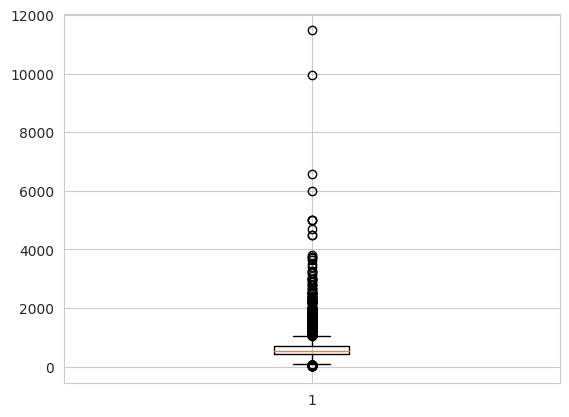

In [147]:
plt.boxplot(df['price_per_week'])

Filter by price: the threshold is determined by looking up in the csv

In [148]:
# lower end 
df = df[df['price_per_week'] > 100]
df.shape

(8988, 18)

In [149]:
df['price_per_week'].quantile(0.9995)

5000.0

In [150]:
# uppper end
type_df_list = []
for prop_type in ['House', 'Apartment / Unit / Flat', 'Other']:
    this_type = df[df['type'] == prop_type]
    upper = this_type['price_per_week'].quantile(0.9995)
    this_type = this_type[this_type['price_per_week'] < upper]
    type_df_list.append(this_type)
df = pd.concat(type_df_list).sort_values(by='price_per_week', ascending=False)
df

,properties_URL,address_line1,address_line2,suburb,postcode,type,price,bond,description,bed,bath,parking,latitude,longitude,price_per_week,property_id,description_lower,is_furnished
13,https://www.domain.com.au/335-the-esplanade-in...,"335 The Esplanade,",INDENTED HEAD VIC 3223,Indented Head,3223,House,"$4,700 pw /$700 pn High, $3,775 pw/$545 pn Low",1000.0,"335 The Esplanade, Indented HeadThis stylish 4...",4.0,3.0,0.0,-38.143992,144.714790,4700.0,12,"335 the esplanade, indented headthis stylish 4...",0
9,https://www.domain.com.au/9-lansdowne-street-b...,"9 Lansdowne Street,",BLAIRGOWRIE VIC 3942,Blairgowrie,3942,House,"$4,500 per week",3000.0,Beautiful beach housePhone enquiry code for th...,3.0,2.0,3.0,-38.372688,144.785647,4500.0,8,beautiful beach housephone enquiry code for th...,1
10,https://www.domain.com.au/3605-439-collins-str...,"3605/439 Collins Street,",MELBOURNE VIC 3000,Melbourne,3000,Apartment / Unit / Flat,"$4,500 Per Week",27000.0,"""Collins Arch Penthouse"" - FULLY FURNISHEDColl...",4.0,3.0,2.0,-37.817688,144.959726,4500.0,9,"""collins arch penthouse"" - fully furnishedcoll...",1
12,https://www.domain.com.au/unit-1805-450-st-kil...,"UNIT 1805/450 ST KILDA ROAD,",MELBOURNE VIC 3004,Melbourne,3004,Apartment / Unit / Flat,"$3,810",11992.0,101 Penthouse on Top of Opéra for rentTo apply...,4.0,3.0,3.0,-37.838773,144.975570,3810.0,11,101 penthouse on top of opéra for rentto apply...,0
15,https://www.domain.com.au/24b-kanowna-street-w...,"24B Kanowna Street,",WILLIAMSTOWN VIC 3016,Williamstown,3016,House,"$3,750 Per Week",4000.0,LUXE By The SeaPhone enquiry code for this pro...,4.0,3.0,0.0,-37.866330,144.909300,3750.0,14,luxe by the seaphone enquiry code for this pro...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,https://www.domain.com.au/905-435-nepean-highw...,"905/435 Nepean Highway,",FRANKSTON VIC 3199,Frankston,3199,Apartment / Unit / Flat,$150 Per Night,200.0,"Top Floor, Breathtaking Bay Views, Impeccable ...",0.0,1.0,0.0,-38.142418,145.121989,150.0,9038,"top floor, breathtaking bay views, impeccable ...",0
9402,https://www.domain.com.au/berth-5274-martha-co...,"Berth 5274 Martha Cove Waterway,",SAFETY BEACH VIC 3936,Safety Beach,3936,House,$150 per week,650.0,Boat Berth B5274- available until December - o...,1.0,1.0,0.0,-38.313801,145.004560,150.0,9040,boat berth b5274- available until december - o...,0
9405,https://www.domain.com.au/18-cedarville-close-...,"18 Cedarville Close,",HIGHTON VIC 3216,Highton,3216,House,$140,606.0,Room 4 rent!Rooms for rent in this student sha...,1.0,2.0,6.0,-38.195080,144.315486,140.0,9043,room 4 rent!rooms for rent in this student sha...,0
9404,https://www.domain.com.au/room-7-35-heatherhil...,"Room 7/35 Heatherhill Road,",FRANKSTON VIC 3199,Frankston,3199,Other,$140/wk,608.0,"Shared accommodation 1 X Rooms available only,...",0.0,1.0,0.0,-38.158619,145.140795,140.0,9042,"shared accommodation 1 x rooms available only,...",0


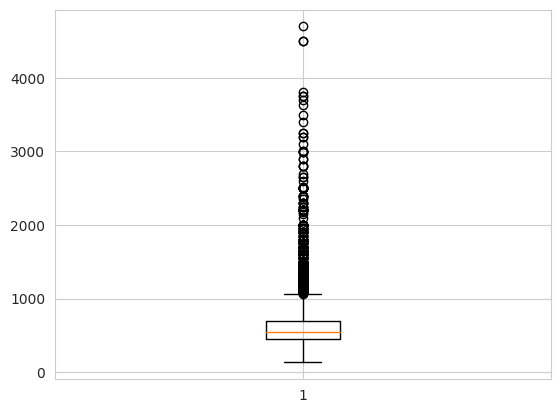

In [151]:
plt.boxplot(df['price_per_week'])
plt.show()

## Change column order

In [152]:
# Change column order
desired_order = [
    'properties_URL', 'property_id', 'suburb', 'postcode', 'type',
    'price_per_week', 'bond', 'bed', 'bath', 'parking', 'is_furnished', 'latitude', 'longitude']

df = df[desired_order]
df['suburb'] = df['suburb'].str.lower()

# Display the first few rows of the DataFrame to verify the new column order
df.head()

/tmp/ipykernel_522985/4255520935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['suburb'] = df['suburb'].str.lower()


,properties_URL,property_id,suburb,postcode,type,price_per_week,bond,bed,bath,parking,is_furnished,latitude,longitude
13,https://www.domain.com.au/335-the-esplanade-in...,12,indented head,3223,House,4700.0,1000.0,4.0,3.0,0.0,0,-38.143992,144.714790
9,https://www.domain.com.au/9-lansdowne-street-b...,8,blairgowrie,3942,House,4500.0,3000.0,3.0,2.0,3.0,1,-38.372688,144.785647
10,https://www.domain.com.au/3605-439-collins-str...,9,melbourne,3000,Apartment / Unit / Flat,4500.0,27000.0,4.0,3.0,2.0,1,-37.817688,144.959726
12,https://www.domain.com.au/unit-1805-450-st-kil...,11,melbourne,3004,Apartment / Unit / Flat,3810.0,11992.0,4.0,3.0,3.0,0,-37.838773,144.975570
15,https://www.domain.com.au/24b-kanowna-street-w...,14,williamstown,3016,House,3750.0,4000.0,4.0,3.0,0.0,1,-37.866330,144.909300


In [153]:
# Create a new dataframe with columns properties_URL and property_id
URL_df = df[['properties_URL', 'property_id']].copy()

order = ['property_id', 'properties_URL']
URL_df = URL_df[order]

# Display the first few rows of the new dataframe
URL_df.head()

,property_id,properties_URL
13,12,https://www.domain.com.au/335-the-esplanade-in...
9,8,https://www.domain.com.au/9-lansdowne-street-b...
10,9,https://www.domain.com.au/3605-439-collins-str...
12,11,https://www.domain.com.au/unit-1805-450-st-kil...
15,14,https://www.domain.com.au/24b-kanowna-street-w...


In [154]:
# Drop the properties_URL column from the original dataframe
df.drop(columns=['properties_URL'], inplace=True)

/tmp/ipykernel_522985/682446293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['properties_URL'], inplace=True)


In [155]:
df

,property_id,suburb,postcode,type,price_per_week,bond,bed,bath,parking,is_furnished,latitude,longitude
13,12,indented head,3223,House,4700.0,1000.0,4.0,3.0,0.0,0,-38.143992,144.714790
9,8,blairgowrie,3942,House,4500.0,3000.0,3.0,2.0,3.0,1,-38.372688,144.785647
10,9,melbourne,3000,Apartment / Unit / Flat,4500.0,27000.0,4.0,3.0,2.0,1,-37.817688,144.959726
12,11,melbourne,3004,Apartment / Unit / Flat,3810.0,11992.0,4.0,3.0,3.0,0,-37.838773,144.975570
15,14,williamstown,3016,House,3750.0,4000.0,4.0,3.0,0.0,1,-37.866330,144.909300
...,...,...,...,...,...,...,...,...,...,...,...,...
9400,9038,frankston,3199,Apartment / Unit / Flat,150.0,200.0,0.0,1.0,0.0,0,-38.142418,145.121989
9402,9040,safety beach,3936,House,150.0,650.0,1.0,1.0,0.0,0,-38.313801,145.004560
9405,9043,highton,3216,House,140.0,606.0,1.0,2.0,6.0,0,-38.195080,144.315486
9404,9042,frankston,3199,Other,140.0,608.0,0.0,1.0,0.0,0,-38.158619,145.140795


## Save the data

In [156]:
df.to_csv('../../data/curated/curated_domain_properties.csv', index = False)
URL_df.to_csv('../../data/curated/prop_url.csv', index = False)